In [1]:
import numpy as np
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB,ComplementNB
from glob import glob
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer as cv
from sklearn.metrics import ConfusionMatrixDisplay as cm,classification_report as cr
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
files=glob('*.csv')

In [3]:
data=[]

In [4]:
for i in files:
    data.append(pd.read_csv(i,delimiter=','))

In [5]:
data[0]['CLASS']

0      1
1      1
2      1
3      1
4      1
      ..
344    0
345    0
346    1
347    1
348    0
Name: CLASS, Length: 349, dtype: int64

In [6]:
for i in range(len(data)):
    data[i]=data[i].drop(['COMMENT_ID','AUTHOR','DATE'],axis=1)

In [7]:
all_data=pd.concat(data,ignore_index=True)

In [8]:
all_data

,CONTENT,CLASS
0,"Huh, anyway check out this you[tube] channel: ...",1
1,Hey guys check out my new channel and our firs...,1
2,just for test I have to say murdev.com,1
3,watch?v=vtaRGgvGtWQ Check this out .﻿,1
4,"Hey, check out my new website!! This site is a...",1
...,...,...
1950,I love this song because we sing it at Camp al...,0
1951,I love this song for two reasons: 1.it is abou...,0
1952,wow,0
1953,Shakira u are so wiredo,0


In [9]:
all_data.isnull().sum()

CONTENT    0
CLASS      0
dtype: int64

In [10]:
all_data['CLASS'].value_counts()

1    1004
0     951
Name: CLASS, dtype: int64

In [11]:
sample1=['How you do anything , is how you do everything','the one rule of life !']
count_vec=cv()
count_vec.fit_transform(sample1).toarray()

array([[1, 2, 1, 2, 1, 0, 0, 0, 0, 0, 2],
       [0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0]], dtype=int64)

In [12]:
count_vec.get_feature_names_out()

array(['anything', 'do', 'everything', 'how', 'is', 'life', 'of', 'one',
       'rule', 'the', 'you'], dtype=object)

In [13]:
count_vec.transform(['How those are birds of life']).toarray()

array([[0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0]], dtype=int64)

In [14]:
count_vec.get_feature_names_out()

array(['anything', 'do', 'everything', 'how', 'is', 'life', 'of', 'one',
       'rule', 'the', 'you'], dtype=object)

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
inputs=all_data['CONTENT']
outputs=all_data['CLASS']

In [17]:
x_train,x_test,y_train,y_test=train_test_split(inputs,outputs,test_size=0.2,
                                               random_state=42,
                                              stratify=outputs)

In [18]:
y_train.value_counts(normalize=True)

1    0.513427
0    0.486573
Name: CLASS, dtype: float64

In [19]:
cv=cv()
x_train_transf=cv.fit_transform(x_train)
x_test_transf=cv.transform(x_test)

In [20]:
cv.get_feature_names_out()

array(['00', '000', '02', ..., 'ｔｈｉｓ', 'ｕｓｒ', 'ｗｗｗ'], dtype=object)

In [21]:
clf=MultinomialNB(class_prior=np.array([0.6,0.4]))

In [22]:
clf.fit(x_train_transf,y_train)

MultinomialNB(class_prior=array([0.6, 0.4]))

In [23]:
np.exp(clf.class_log_prior_)

array([0.6, 0.4])

In [24]:
y_test_pred=clf.predict(x_test_transf)

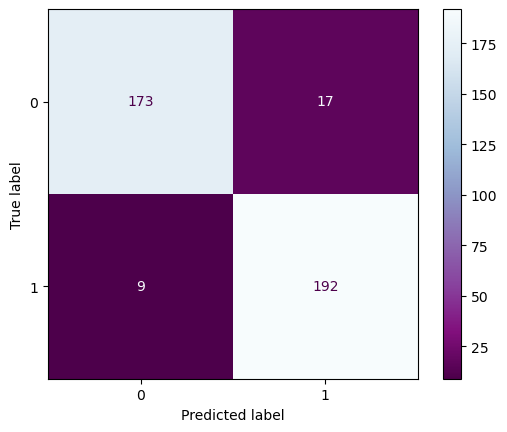

In [26]:
sns.reset_orig()
cm.from_predictions(y_test,y_test_pred,labels=clf.classes_,cmap='BuPu_r')

In [27]:
print(cr(y_test,y_test_pred,target_names=['Ham','Spam']))

              precision    recall  f1-score   support

         Ham       0.95      0.91      0.93       190
        Spam       0.92      0.96      0.94       201

    accuracy                           0.93       391
   macro avg       0.93      0.93      0.93       391
weighted avg       0.93      0.93      0.93       391



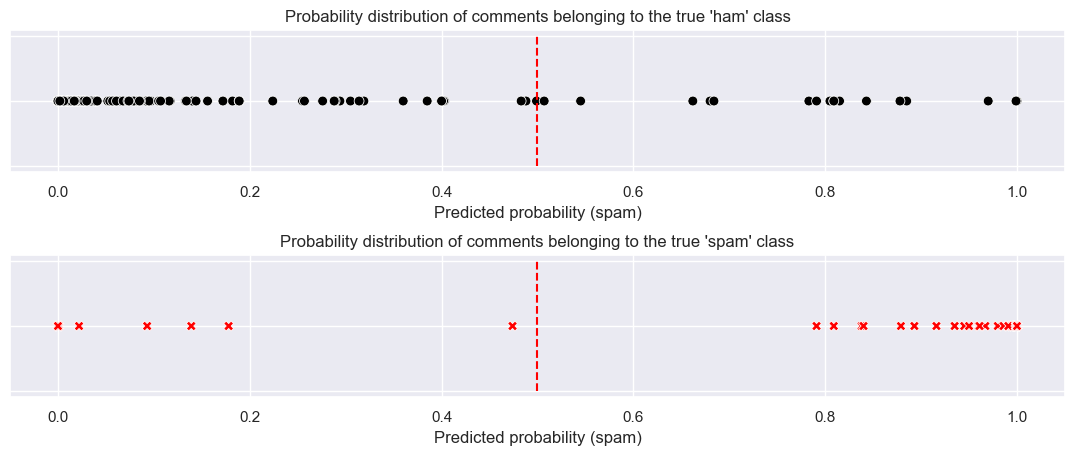

In [28]:
spam_proba = clf.predict_proba(x_test_transf).round(3)[:,1];

df_scatter = pd.DataFrame()

df_scatter['True class'] = y_test
df_scatter['Predicted class'] = y_test_pred
df_scatter['Predicted probability (spam)'] = spam_proba

df_scatter = df_scatter.reset_index(drop = True)

palette_0 = sns.color_palette(['#000000'])
palette_1 = sns.color_palette(['#FF0000'])

df_scatter_0 = df_scatter[df_scatter['True class'] == 0].reset_index(drop = True)
df_scatter_1 = df_scatter[df_scatter['True class'] == 1].reset_index(drop = True)

sns.set()

fig, (ax1,ax2) = plt.subplots(2,1, figsize=(12,5))
fig.tight_layout(pad = 3)

sns.scatterplot(x = 'Predicted probability (spam)', 
                y = np.zeros(df_scatter_0.shape[0]), 
                data = df_scatter_0,
                hue = 'True class', 
                s = 50,
                markers = ['o'],
                palette = palette_0,
                style = 'True class',
                legend = False, 
                ax = ax1).set(yticklabels=[])

ax1.set_title('Probability distribution of comments belonging to the true \'ham\' class')
ax1.vlines(0.5, -1, 1, linestyles = 'dashed', colors = 'red');


sns.scatterplot(x = 'Predicted probability (spam)', 
                y = np.zeros(df_scatter_1.shape[0]), 
                hue = 'True class', 
                data = df_scatter_1,
                s = 50,
                palette = palette_1,
                markers = ['X'],
                style = 'True class',
                legend = False, 
                ax = ax2).set(yticklabels=[])

ax2.set_title('Probability distribution of comments belonging to the true \'spam\' class')

ax2.vlines(0.5, -1, 1, linestyles = 'dashed', colors = 'red');

In [36]:
test_sample=['this song is amazing','Free 1 million dollar click here fast !!!']

In [37]:
test_sample=cv.transform(test_sample)

In [38]:
clf.predict(test_sample)

array([0, 1], dtype=int64)